# Real Property Tax vs Housing Permits

## INTRODUCTION 

### Data Sources 

- https://data.baltimorecity.gov/Financial/Real-Property-Taxes/27w9-urtv

- https://data.baltimorecity.gov/Housing-Development/Housing-Permits/fesm-tgxf

### Data Description 

- Real Property Tax data has the CityTax and StateTax each house should pay and other details of the plot <br>
#### <tb>Real Property Dataset has following features: 
PropertyID, Block, Lot, Ward, Sect, PropertyAddress, LotSize, CityTax, StateTax, ResCode, AmountDue, AsOfDate, Neighborhood, PoliceDistrict, CouncilDistrict, Location</tb>
- Housing Permits has the data of the permissions each house has got over the last year
#### <tb>Dataset includes the following features: 
PropertyID, Block, Lot, Ward, Sect, PropertyAddress, LotSize, CityTax, StateTax, ResCode, AmountDue, AsOfDate, Neighborhood, PoliceDistrict, CouncilDistrict, Location</tb>

### Export CSV Datasets

###  Real Property Dataset has following features: 
PropertyID, Block, Lot, Ward, Sect, PropertyAddress, LotSize, CityTax, StateTax, ResCode, AmountDue, AsOfDate, Neighborhood, PoliceDistrict, CouncilDistrict, Location
  

### Questions on the data: 

#### 1. Which part of the City pays the highest Tax and Why ? 
#### 2. Which part of the City has the highest Cost estimation for the housing permits ?
#### 3. Can we locate on the map and analyse which is costliest area ?

### Answers retrieved from the data: 

#### 1. Which part of the City pays the highest Tax and Why ? 
####  - From one of the plots below we can see clearly see that the top 5 tax paying neighborhoood are in the following order : Selton Business Park, Inner Harbor, Carroll Park, Canton Industrail Area, Middle Branch/Reedbird Parks. It can be inferred that all these are commercial areas and are not a principal residence. Hence they pay more taxes than residential areas.

#### 2. Which part of the City has the highest Cost estimation for the housing permits ?
####  - For any house/plot in the area, there would be a cost associated with the changes that they are going to implement on their house/plot and get the permits accordingly. Generally industrail areas would be already established or might be renovating and would want to make changes, so they tend to spend more. I have confirmed the information gathered from one of the plots. The order of the results are in the following order: 
#### Seton Business Park, Hopkins Bayview, Carroll - Camden Industrail Area, Canton Industrial Area, Locust point Industrial Area

#### 3. Can we locate on the map and analyse which is costliest area ?
####   - Yes, we can. I wanted to plot the data on the real time map. So I used a library called Folium. But I had a problem running the same on my machine, so I took the help of colab and plotted few datapoints on the map and analysed what are the areas of industries and what are the areas of residence.

In [1]:
# Few methods like countplot, catplot are in 0.9.0
# So I have installed this latest version

#!pip install seaborn==0.9.0
#!pip install folium

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") # ignore warnings

## Loading the Data

In [3]:
df1 = pd.read_csv("Real_Property_Taxes.csv")
df2 = pd.read_csv("Housing_Permits.csv")

## Understanding the Data

#### Shape of the Data

In [4]:
print(df1.shape)
df2.shape

(238596, 16)


(595470, 19)

#### Columns in the data

In [5]:
print(df1.columns)
print(df2.columns)

Index(['PropertyID', 'Block', 'Lot', 'Ward', 'Sect', 'PropertyAddress',
       'LotSize', 'CityTax', 'StateTax', 'ResCode', 'AmountDue', 'AsOfDate',
       'Neighborhood', 'PoliceDistrict', 'CouncilDistrict', 'Location'],
      dtype='object')
Index(['PermitID', 'CaseNum', 'Block', 'Lot', 'PropertyAddress', 'PermitNum',
       'DateIssue', 'PermitDescription', 'Cost_Est', 'DateExpire', 'Prop_Use',
       'Existing_Use', 'Neighborhood', 'PoliceDistrict', 'CouncilDistrict',
       'Location', '2010 Census Neighborhoods', '2010 Census Wards Precincts',
       'Zip Codes'],
      dtype='object')


#### Dropping Few Columns

In [6]:
data_1 = df1.drop(['Ward', 'Sect', 'AsOfDate', 'CouncilDistrict', 'Neighborhood', 'PoliceDistrict'],axis=1)

data_2 = df2.drop(['PermitNum', 'DateIssue', 'DateExpire', 'CouncilDistrict', 'Location',
        '2010 Census Neighborhoods', '2010 Census Wards Precincts', 'Zip Codes'], axis=1)

#### Merging Data by PropertyAddress, Block and Lot

In [7]:
My_Data = pd.merge(data_1, data_2, on=['PropertyAddress','Block','Lot'], how='inner')
My_Data.head(3)

PropertyID Block  Lot   PropertyAddress            LotSize  CityTax  \
0    0001004  0001  004  2039 W NORTH AVE  14X83-10            472.08   
1    0001005  0001  005  2037 W NORTH AVE  14X83-10            472.08   
2    0001005  0001  005  2037 W NORTH AVE  14X83-10            472.08   

   StateTax                    ResCode  AmountDue  \
0     23.52  NOT A PRINCIPAL RESIDENCE        NaN   
1     23.52  NOT A PRINCIPAL RESIDENCE        NaN   
2     23.52  NOT A PRINCIPAL RESIDENCE        NaN   

                      Location            PermitID        CaseNum  \
0  (39.30941951, -76.65099026)  201010071230407500  COM2010-22429   
1  (39.30942111, -76.65094166)  201603221353139260  USE2016-01231   
2  (39.30942111, -76.65094166)  20180924124010473B  COM2018-77088   

                                   PermitDescription  Cost_Est Prop_Use  \
0  upgrade electrical service for 1st & 2nd floor...    1500.0     MIXC   
1   (use)the premises for convenience /grocery store       NaN     DELI   
2               install (1)  # gas test as per code.     500.0     1-08   

  Existing_Use Neighborhood PoliceDistrict  
0         MIXC   EASTERWOOD        Western  
1         BEAU   EASTERWOOD        Western  
2         1-08   EASTERWOOD        Western

#### Dropping null values and duplicates because we have enough data

In [8]:
final_data = My_Data.dropna()

In [9]:
final_data = final_data.drop_duplicates()

Looking at the head to observe how the data looks

In [10]:
final_data.head(3)

PropertyID Block  Lot     PropertyAddress            LotSize  CityTax  \
33    7130005  7130  005  4109 HILLCREST AVE  50X125             2823.49   
35    5918064  5918  064     3429 SHANNON DR  18X91-9            2801.01   
36    5918064  5918  064     3429 SHANNON DR  18X91-9            2801.01   

    StateTax                    ResCode  AmountDue  \
33    140.67  PRINCIPAL RESIDENCE          1412.17   
35    139.55  PRINCIPAL RESIDENCE          1382.85   
36    139.55  PRINCIPAL RESIDENCE          1382.85   

                       Location            PermitID        CaseNum  \
33  (39.23046652, -76.60677738)  200907080844238590  COM2009-15690   
35   (39.3229146, -76.56235554)  200410080842135150  COM2004-25154   
36   (39.3229146, -76.56235554)  200409231415430440  COM2004-23576   

                                    PermitDescription  Cost_Est Prop_Use  \
33  install 2.5 ton a/c unit with new disconnect; ...    7466.0       SF   
35        replace kitchen sink  replace water heater.    1000.0       SF   
36  temporary construction service permit to energ...    3000.0       SF   

   Existing_Use   Neighborhood PoliceDistrict  
33           SF       BROOKLYN       Southern  
35           SF  BELAIR-EDISON    Notheastern  
36          VAC  BELAIR-EDISON    Notheastern

#### Check if there is any missing data in the file

In [11]:
final_data.count()

PropertyID           214556
Block                214556
Lot                  214556
PropertyAddress      214556
LotSize              214556
CityTax              214556
StateTax             214556
ResCode              214556
AmountDue            214556
Location             214556
PermitID             214556
CaseNum              214556
PermitDescription    214556
Cost_Est             214556
Prop_Use             214556
Existing_Use         214556
Neighborhood         214556
PoliceDistrict       214556
dtype: int64

Looking at the result above we can say that no column has missing data

#### Writing the data into a CSV for reference ~ 77MB

#### Hence Data Used for Project - 77MB

In [12]:
final_data.to_csv("Dropped_data.csv")

#### Now let us understand the shape of dataframe

In [13]:
final_data.shape

(214556, 18)

#### Now let us understand the type of each column

In [14]:
final_data.dtypes

PropertyID            object
Block                 object
Lot                   object
PropertyAddress       object
LotSize               object
CityTax              float64
StateTax             float64
ResCode               object
AmountDue            float64
Location              object
PermitID              object
CaseNum               object
PermitDescription     object
Cost_Est             float64
Prop_Use              object
Existing_Use          object
Neighborhood          object
PoliceDistrict        object
dtype: object

### Data Inconsistences

> I have dropped all the missing values because I have enough data to analyse on.<br> <br>
Location type is object, I would want it to be divided to Latitude and Longitude seperately and convert them to float.<br> Though the feature names are self understandable from the name, no detailed description of the data is given. </font>

###  Data Cleaning (Dealing with the Data Inconsistences) 
>  It is understood that each record has a house address detail and the housing permit ID they hold and description of permit. Cost Estimation is also given.   
<br><br>
Location has to be plotted on the map. <br>
So the coordinates should be of type int. <br>
Only intuitive understanding of the data is known from the features. 

### 'label' function definition:
This function takes a plot as an argument and computes the label that has to be displayed<br> on each bar of the plot.

In [15]:
def label (plot):
    for rect in plot.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = 5
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'
            # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)

            # Create annotation
        plot.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                            # positive and negative values.
    plt.show()
    

# Plots

In [16]:
sns.set(style="ticks", color_codes=True)

The below plot is to understand how are principal residence and not a principal residence

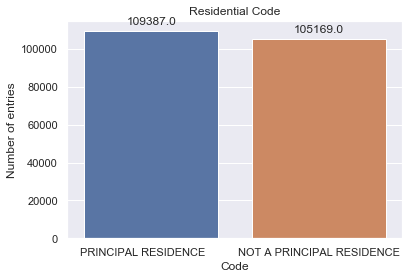

In [17]:
sns.set(rc={'figure.figsize':(6,4)})
plot = sns.countplot(x='ResCode', data = final_data)
plot.set_title('Residential Code')
plot.set_xlabel('Code')
plot.set_ylabel('Number of entries')
label(plot)

Almost equally distributed

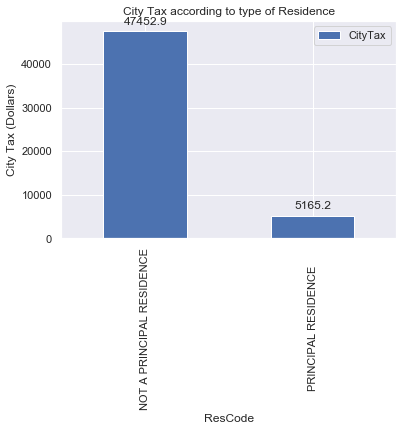

In [18]:
sns.set(rc={'figure.figsize':(6,4)})
plot = final_data.groupby('ResCode').mean().plot(y='CityTax', kind='bar')
plot.set_title('City Tax according to type of Residence')
plot.set_xlabel('ResCode')
plot.set_ylabel('City Tax (Dollars)')
label(plot)

From the plot we understand that : Not a Principle Residence has more Companies or Commercial buildings whereas Principal Residence has only Residents staying.

#### Let us see which neighborhod has the highest city tax?

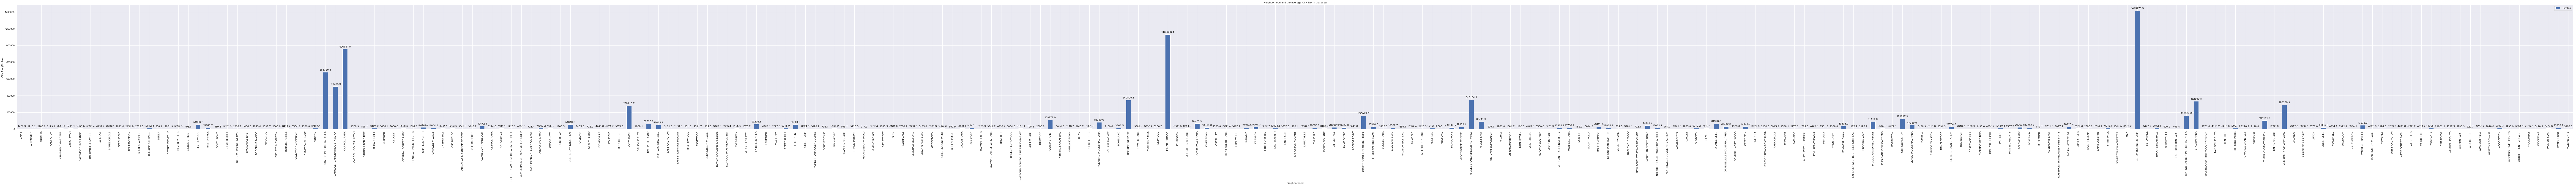

In [19]:
sns.set(rc={'figure.figsize':(200,10)})
plot = final_data.groupby('Neighborhood').mean().plot(y='CityTax', kind='bar')
plot.set_title('Neighborhood and the average City Tax in that area')
plot.set_xlabel('Neighborhood')
plot.set_ylabel('City Tax (Dollars)')
label(plot)

Selton Business Park, Inner Harbor, Carroll Park, Canton Industrail Area, Carroll - Camden Industrail Area 

The above plot gives evidence for the Question 1. 

#### Let us see which neighborhod has the highest state tax?

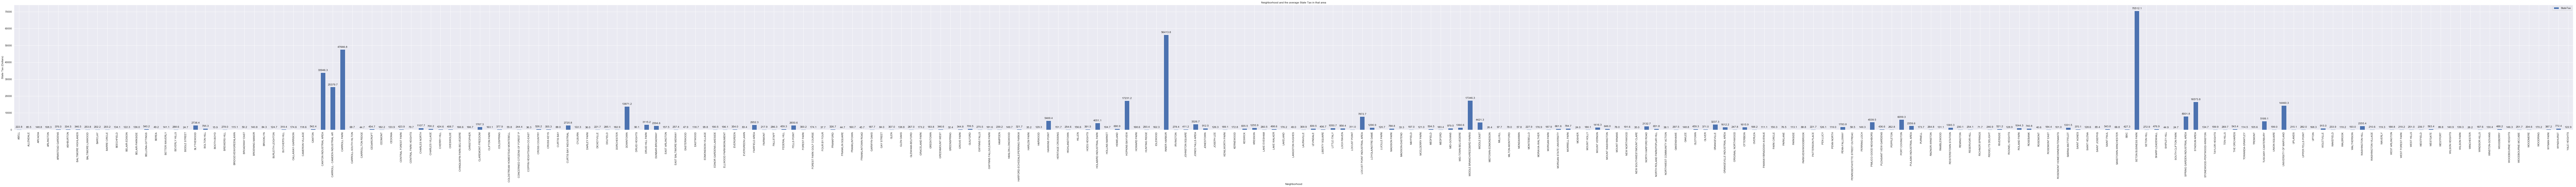

In [20]:
sns.set(rc={'figure.figsize':(200,10)})
plot = final_data.groupby('Neighborhood').mean().plot(y='StateTax', kind='bar')
plot.set_title('Neighborhood and the average State Tax in that area')
plot.set_xlabel('Neighborhood')
plot.set_ylabel('State Tax (Dollars)')
label(plot)

Selton Business Park, Inner Harbor, Carroll Park, Canton Industrail Area, Carroll - Camden Industrail Area 

#### Let us see which neighborhod has the highest Amount Due?

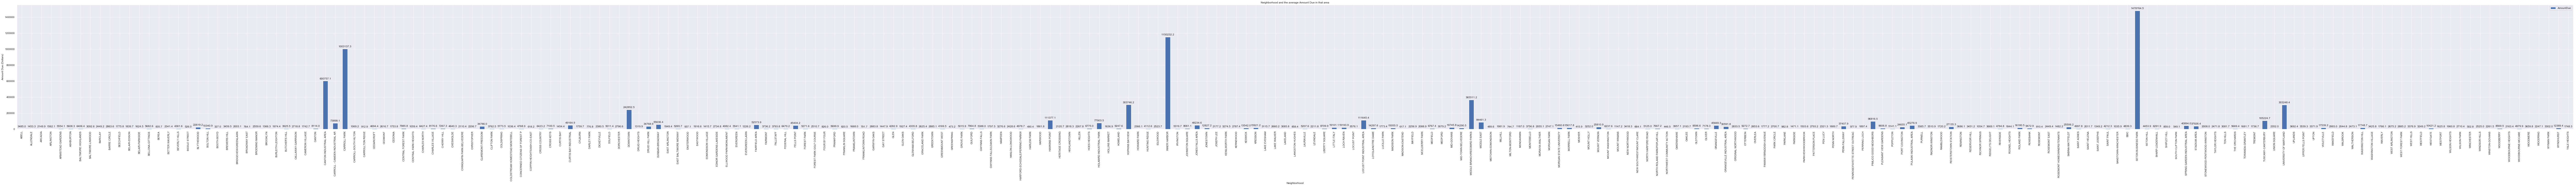

In [21]:
sns.set(rc={'figure.figsize':(200,10)})
plot = final_data.groupby('Neighborhood').mean().plot(y='AmountDue', kind='bar')
plot.set_title('Neighborhood and the average Amount Due in that area')
plot.set_xlabel('Neighborhood')
plot.set_ylabel('Amount Due (Dollars)')
label(plot)

Selton Business Park, Inner Harbor, Carroll Park, Canton Industrail Area, Middle Branch/Reedbird Parks

#### Let us see which neighborhod has the highest cost estimation for the permits they have?

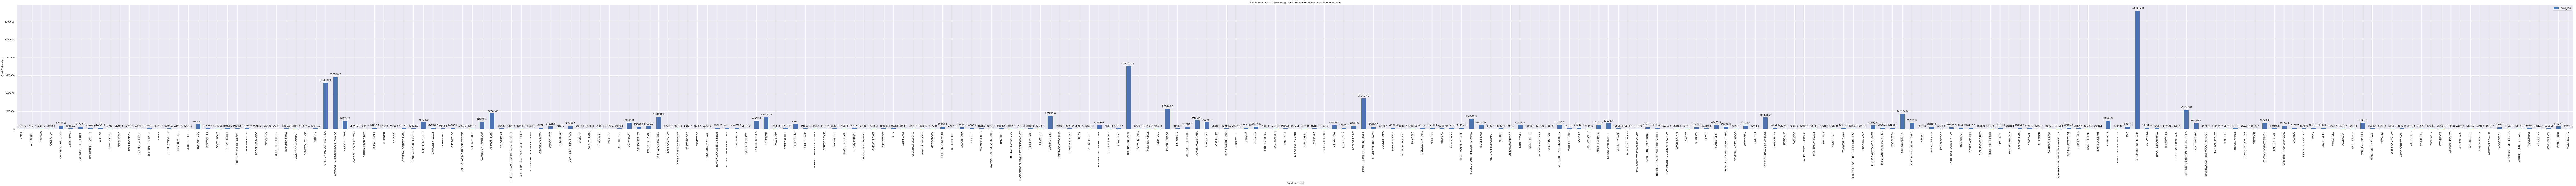

In [22]:
sns.set(rc={'figure.figsize':(200,10)})
plot = final_data.groupby('Neighborhood').mean().plot(y='Cost_Est', kind='bar')
plot.set_title('Neighborhood and the average Cost Estimation of spend on house permits')
plot.set_xlabel('Neighborhood')
plot.set_ylabel('Cost Estimated')
label(plot)

Seton Business Park, Hopkins Bayview, Carroll - Camden Industrail Area, Canton Industrial Area, Locust point Industrial Area

The above plot gives evidence for the Question 2. 

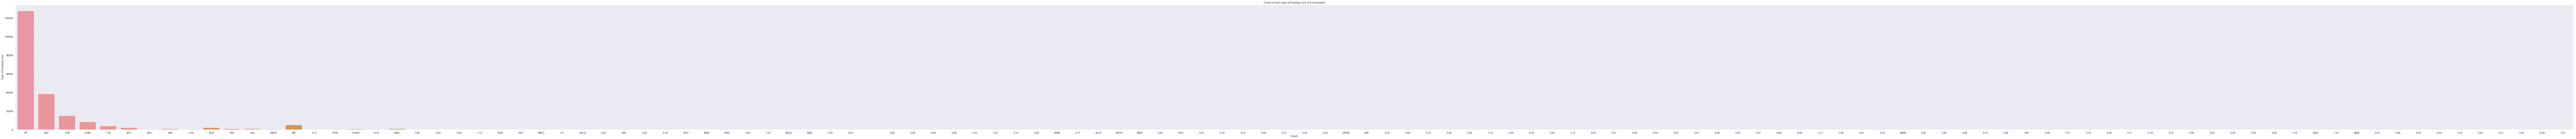

In [23]:
sns.set(rc={'figure.figsize':(200,10)})
plot = sns.countplot(x= "Existing_Use", data = final_data)
plot.set_title('Count of each type of Existing Use of a house/plot')
plot.set_xlabel('Count')
plot.set_ylabel('Type of Existing Use')

plt.show()

The above plot shows "How are the houses being used?"

###  Data Cleaning Process

> ### Transformations
- First we had to deal with Understanding of the data.
- Few Outliers in industrail sector has inclined the results.
> To compare the results between them we had to normalize the data. 
Below is the normalisation process

I have decided to Normalize the data using the formula<br>
<br>
Value = [(Value - Min) / (Max-Min)]
</font>

In [24]:
# Standardizing the CityTax
CityTax_std=(final_data['CityTax']-final_data['CityTax'].min())/(final_data['CityTax'].max() - final_data['CityTax'].min())
final_data['CityTax'] = CityTax_std

# Standardizing the StateTax amount
StateTax_std=(final_data['StateTax']-final_data['StateTax'].min())/(final_data['StateTax'].max() - final_data['StateTax'].min())
final_data['StateTax'] = StateTax_std

# Standardizing the AmountDue
AmountDue_std=(final_data['AmountDue']-final_data['AmountDue'].min())/(final_data['AmountDue'].max() - final_data['AmountDue'].min())
final_data['AmountDue'] = AmountDue_std

# Standardizing the Cost_Est
Cost_Est_std=(final_data['Cost_Est']-final_data['Cost_Est'].min())/(final_data['Cost_Est'].max() - final_data['Cost_Est'].min())
final_data['Cost_Est'] = Cost_Est_std

###  Data Cleaning Process Continued.. 

The below code is converge Location feature from a string format to float format and prepare the data dividing it into two different columns - one Latitude and other Longitude. 

Example: - Location - (39.23061826, -76.60593402) --->  Latitude - 39.23061826, Longitude - -76.60593402

In [25]:
final_data['Location'] = final_data['Location'].str.replace('(', '')
final_data['Location'] = final_data['Location'].str.replace(',', '')
final_data['Location'] = final_data['Location'].str.replace(')', '')

final_data[['Latitude','Longitude']] = final_data['Location'].str.split(" ",expand=True,)
#Location_coordinates = latlon[['Latitude','Longitude']] 

final_data['Latitude'] = final_data['Latitude'].astype(float)
final_data['Longitude'] = final_data['Longitude'].astype(float)

In [26]:
final_data.head (3)

PropertyID Block  Lot     PropertyAddress            LotSize   CityTax  \
33    7130005  7130  005  4109 HILLCREST AVE  50X125             0.000448   
35    5918064  5918  064     3429 SHANNON DR  18X91-9            0.000444   
36    5918064  5918  064     3429 SHANNON DR  18X91-9            0.000444   

    StateTax                    ResCode  AmountDue                  Location  \
33  0.000448  PRINCIPAL RESIDENCE         0.000355  39.23046652 -76.60677738   
35  0.000444  PRINCIPAL RESIDENCE         0.000347   39.3229146 -76.56235554   
36  0.000444  PRINCIPAL RESIDENCE         0.000347   39.3229146 -76.56235554   

              PermitID        CaseNum  \
33  200907080844238590  COM2009-15690   
35  200410080842135150  COM2004-25154   
36  200409231415430440  COM2004-23576   

                                    PermitDescription  Cost_Est Prop_Use  \
33  install 2.5 ton a/c unit with new disconnect; ...  0.000050       SF   
35        replace kitchen sink  replace water heater.  0.000007       SF   
36  temporary construction service permit to energ...  0.000020       SF   

   Existing_Use   Neighborhood PoliceDistrict   Latitude  Longitude  
33           SF       BROOKLYN       Southern  39.230467 -76.606777  
35           SF  BELAIR-EDISON    Notheastern  39.322915 -76.562356  
36          VAC  BELAIR-EDISON    Notheastern  39.322915 -76.562356

Cleaned Data Characteristics:
> -  The data is normalised and if we look at the above description, we can identify that the outliers cannot skew our plot or effect our analysis. We have dealt with the outliers.
> - Latitude and Longitude are changed to float type and Location column has to be dropped.

In [27]:
columns = final_data.columns
# Dropping Location column
drop_cols = ['Location']
cols_of_int = [item for item in columns if item not in drop_cols]
final_data = final_data[cols_of_int]

In [28]:
final_data.head(3)

PropertyID Block  Lot     PropertyAddress            LotSize   CityTax  \
33    7130005  7130  005  4109 HILLCREST AVE  50X125             0.000448   
35    5918064  5918  064     3429 SHANNON DR  18X91-9            0.000444   
36    5918064  5918  064     3429 SHANNON DR  18X91-9            0.000444   

    StateTax                    ResCode  AmountDue            PermitID  \
33  0.000448  PRINCIPAL RESIDENCE         0.000355  200907080844238590   
35  0.000444  PRINCIPAL RESIDENCE         0.000347  200410080842135150   
36  0.000444  PRINCIPAL RESIDENCE         0.000347  200409231415430440   

          CaseNum                                  PermitDescription  \
33  COM2009-15690  install 2.5 ton a/c unit with new disconnect; ...   
35  COM2004-25154        replace kitchen sink  replace water heater.   
36  COM2004-23576  temporary construction service permit to energ...   

    Cost_Est Prop_Use Existing_Use   Neighborhood PoliceDistrict   Latitude  \
33  0.000050       SF           SF       BROOKLYN       Southern  39.230467   
35  0.000007       SF           SF  BELAIR-EDISON    Notheastern  39.322915   
36  0.000020       SF          VAC  BELAIR-EDISON    Notheastern  39.322915   

    Longitude  
33 -76.606777  
35 -76.562356  
36 -76.562356

#### Now let us plot a correlation Plot

In [29]:
# Dropping Categorical columns
drop_cols = ['PropertyID', 'Block', 'Lot', 'PropertyAddress', 'LotSize','ResCode', 'Location',
             'PermitID', 'CaseNum', 'PermitDescription', 'Prop_Use', 'Existing_Use', 'Neighborhood', 'PoliceDistrict']
cols_of_int = [item for item in columns if item not in drop_cols]
int_columns = final_data[cols_of_int]

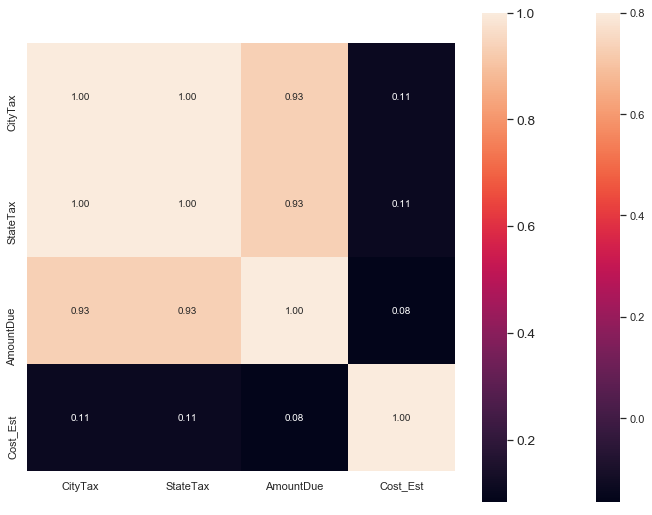

In [30]:
#correlation matrix
corrmat = int_columns.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
sns.set(rc={'figure.figsize':(6,6)})
#poly_inforce_qty correlation matrix
k = 4 #number of variables for heatmap
cols = corrmat.nlargest(k, 'CityTax')['CityTax'].index
cm = np.corrcoef(final_data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':10}, 
                 yticklabels=cols.values, xticklabels=cols.values)
plt.show()

###  Patterns Observed
#### Inferences from Correlation Plot: 
   - State Tax and City Tax are directly proportional
   - State Tax and City Tax are strongly correlated with Amount Due. But Housing permits has nothing to do with Tax Data. 

#### Now let us locate few records on the map

In [31]:
locations = final_data[['Latitude', 'Longitude']]
locationlist = locations.values.tolist()
len(locationlist)
locationlist[7]

[39.23061826, -76.60593402]

<b> Note: This is a function to locate a point on the point according to the type of residence. 

It plots all the Principal Residences with a red point on map, and non a primary address with a blue mark.

In [32]:
def clr(point):
    if final_data['ResCode'][point] == 'PRINCIPAL RESIDENCE      ':
        return 'red'
    elif final_data['ResCode'][point] == 'NOT A PRINCIPAL RESIDENCE':
        return 'green'
    else :
        return 'blue'

#### The following code cell executes in the Colab, but not on my local machine. I have uploaded the data to Colab and worked on plotting the location on the map. I have got a result as shown in the picture below. The two maps show around 1500 locations plotted. I randomly plotted 1500 out of approximately 100000 records. I have taken a screenshot of the output and included the results as a png in this notebook. 

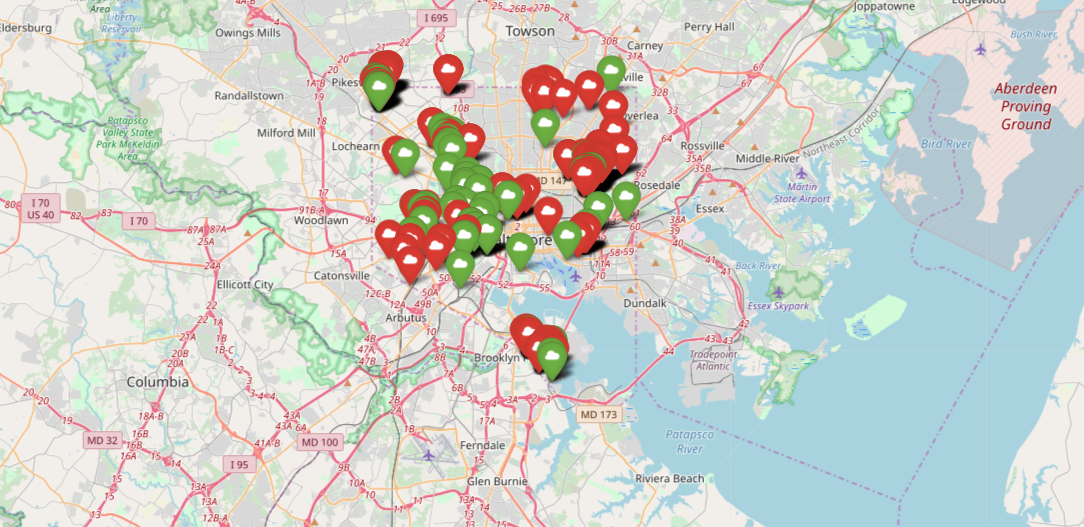

In [36]:
#!pip install Image
from IPython.display import Image
Image(filename='output1.png')

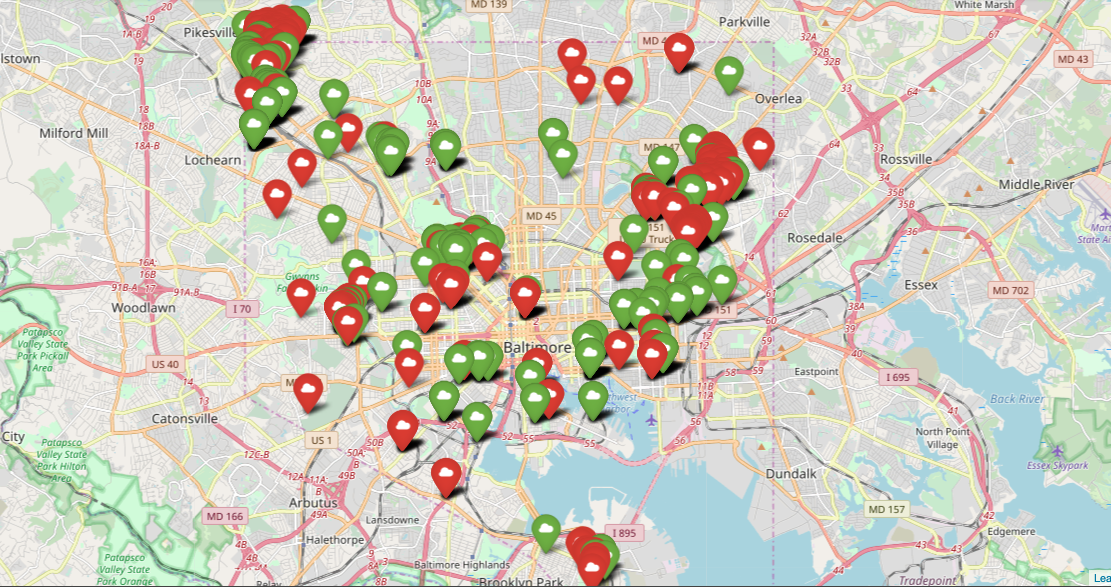

In [34]:
#!pip install Image
from IPython.display import Image
Image(filename='output2.png')

### Answers for the Question 3 can be seen in the above two map plots

## Few Extra Plots

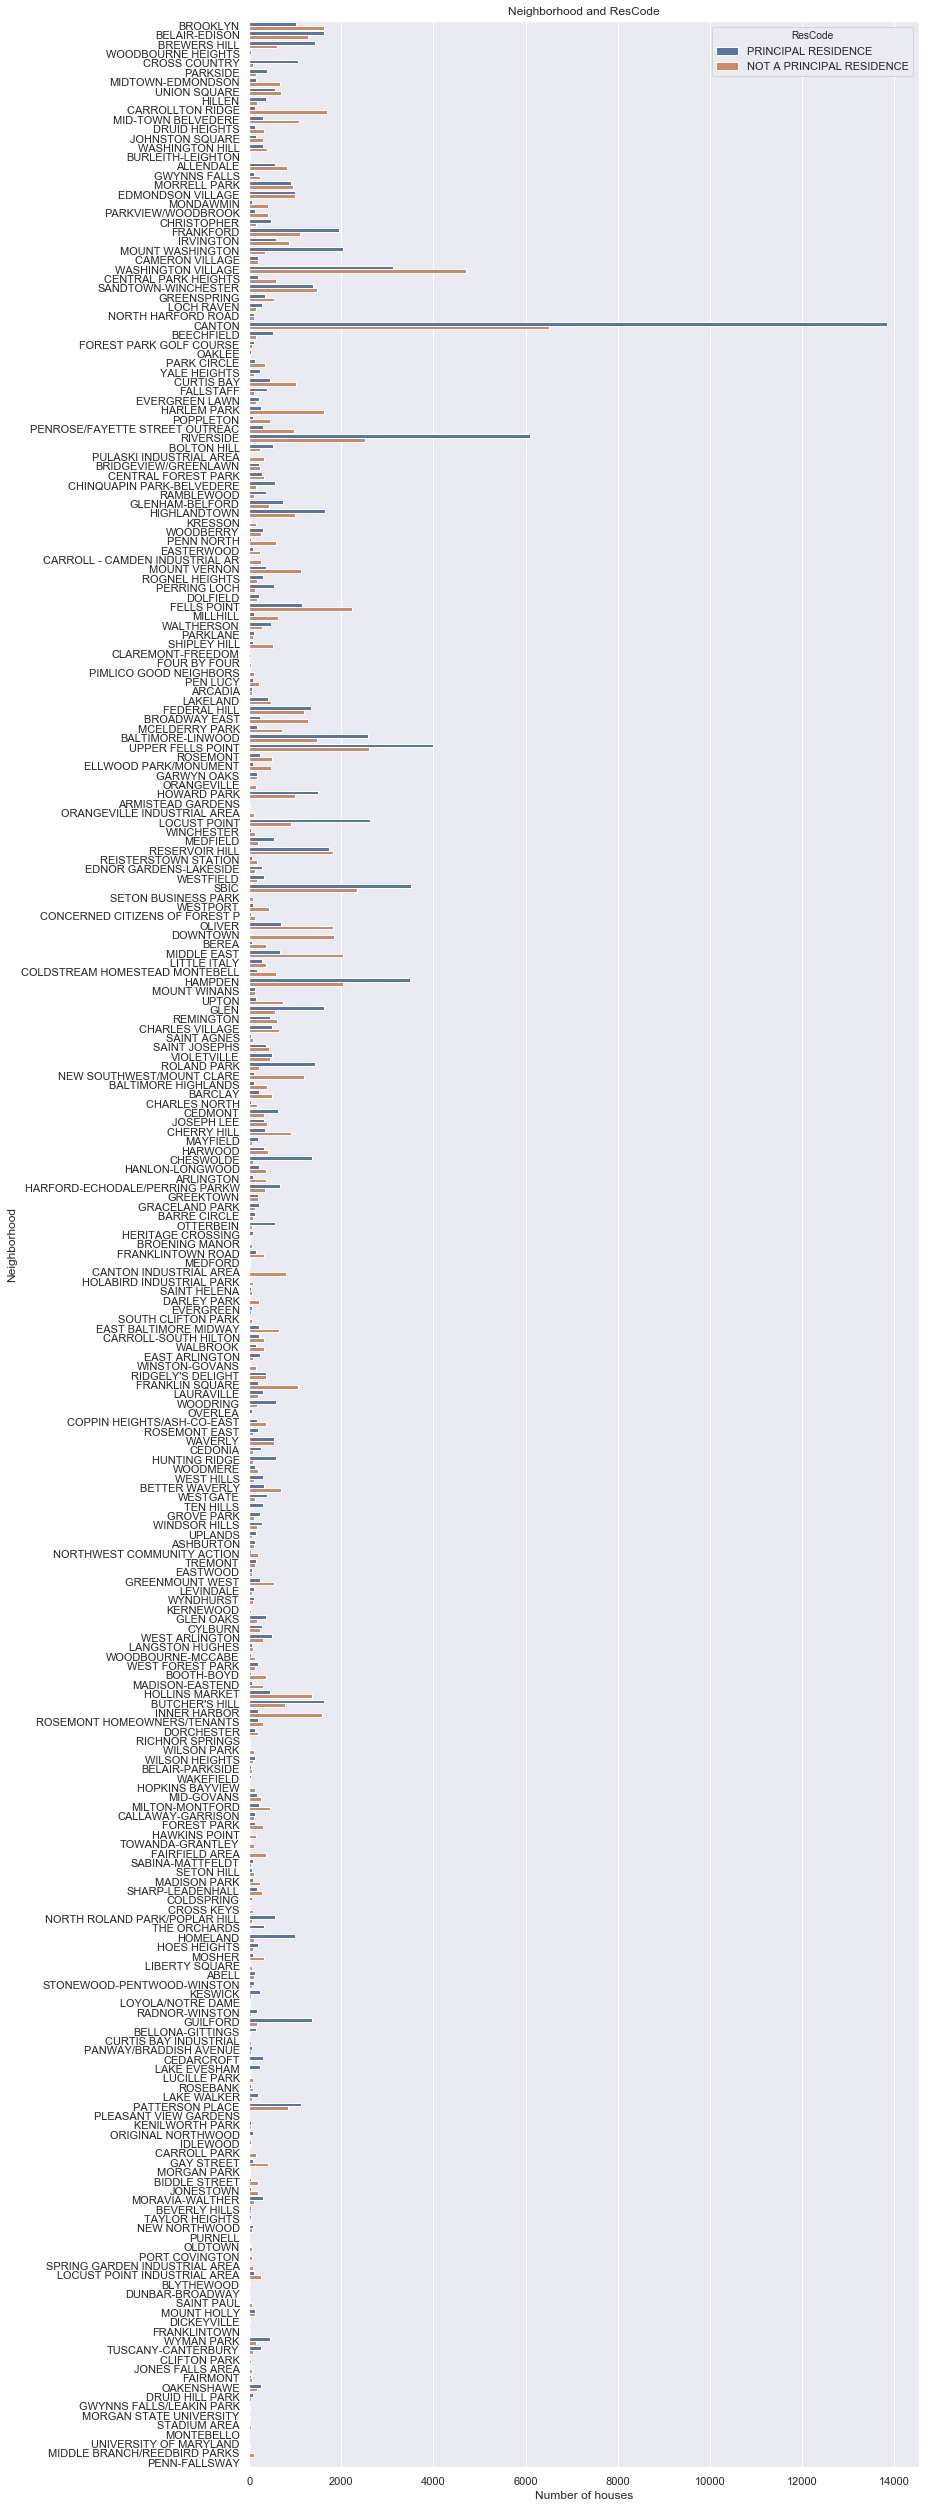

In [35]:
sns.set(rc={'figure.figsize':(12,45)})
plot = sns.countplot(y= "Neighborhood", hue = "ResCode", data = final_data)
plot.set_title('Neighborhood and ResCode')
plot.set_xlabel('Number of houses')
plot.set_ylabel('Neighborhood')

plt.show()

The above plot shows how many residence and commercial houses are there in each of the neighborhood.

### Primary Observation:

#### Industrial Areas tend to pay more Taxes and also cost of spend for changes (from housing permits data) in their house or plot is also high.

### Lessons Learnt 

The main lessons that I have learnt during this project is :
1. Industrail Area tend to pay close to ten times tax that of residential areas.
2. Learned to plot the locations in the data
3. Having the questions framed before and trying to trace out the answers from the data is fun. I have learnt a new approach on how to question the data.
4. Also had an opportunity to deal with the comparision of huge difference data - by normalisation